ssr = 0.9521454565721144

train epoch #0
C is (w1=0.5451232778933295, w2=0.7063586528941412, b=0)
my_out = 0.4944510570258988
my_out = 0.2502963861574941
my_out = 0.3815862945253306
ssr = 0.9521454565721144
dSsr = -0.25266747541744694
dSsrBydW1 = -0.2343393667984604
dSsrBydW2 = -0.392350034299256

train epoch #1
C is (w1=0.47482146785379137, w2=0.5886536426043645, b=-0.07580024262523408)
my_out = 0.336257307197821
my_out = 0.24176878300674745
my_out = 0.3614487884127703
ssr = 0.8186287817120583
dSsr = 0.12105024276532261
dSsrBydW1 = -0.02746083622713047
dSsrBydW2 = -0.16746774327964836

train epoch #2
C is (w1=0.46658321698565225, w2=0.53841331962047, b=-0.03948516979563729)
my_out = 0.41156281987035814
my_out = 0.37564776855294923
my_out = 0.5012567131216814
ssr = 0.8104579560621041
dSsr = -0.5769346030899776
dSsrBydW1 = -0.4698590933434943
dSsrBydW2 = -0.3264470552396811

train epoch #3
C is (w1=0.32562548898260396, w2=0.4404792030485657, b=-0.21256555072263056)
my_out = 0.0957698914

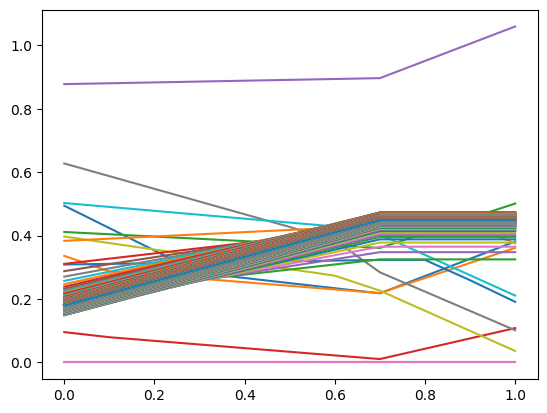

In [38]:
import numpy as np
from matplotlib import pyplot as plt

stepSize = 0.3

def relu(x): return max(0.0, x)
def relu_derivative(x):
    if x >= 0:
        return 1
    else:
        return 0

class Node:
    def __init__(self):
        self.w = np.random.rand() * 2 - 1
        self.b = 0
    def toString(self):
        return f"(w={self.w}, b={self.b})"
    def output(self, input):
        self.out = relu(input * self.w + self.b)
        return self.out

class Node2:
    def __init__(self):
        self.w1 = np.random.rand() * 2 - 1
        self.w2 = np.random.rand() * 2 - 1
        self.b = 0
    def toString(self):
        return f"(w1={self.w1}, w2={self.w2}, b={self.b})"
    def output(self, input1, input2):
        self.out = relu(input1 * self.w1 + input2 * self.w2 + self.b)
        return self.out

class NeuralNet:
    def __init__(self):
        self.a = Node()
        self.a.w = 1.0
        self.a.b = -0.3
        self.b = Node()
        self.b.w = -1.0
        self.b.b = 0.7
        self.c = Node2()
        # self.c.w1 = -3.2
        # self.c.w2 = -3.2
        # self.c.b = 1.2
    def ff(self, input):
        # print(f"ff! {input}")
        # print(self.a.output(input))
        # print(self.b.output(input))
        # print(self.c.output(self.a.output(input), self.b.output(input)))
        return self.c.output(self.a.output(input), self.b.output(input))
    def calc_ssr(self, inputs, outputs):
        ssr = 0
        for i in range(len(inputs)):
            input = inputs[i]
            output = outputs[i]
            my_out = self.ff(input)
            ssr += (my_out - output) ** 2
        return ssr
    def train_epoch(self, inputs, outputs):
        print(f"C is {self.c.toString()}")
        # train C
        dSsr = 0
        ssr = 0
        dSsrBydW1 = 0
        dSsrBydW2 = 0
        dSsrBydWa = 0
        sSsrByWaB = 0
        for i in range(len(inputs)):
            input = inputs[i]
            output = outputs[i]
            my_out = self.ff(input)
            print(f"my_out = {my_out}")
            ssr += (my_out - output) ** 2
            dSsr += -2 * (my_out - output)
            dSsrBydW1 += -2 * (my_out - output) * relu_derivative(output) * self.a.out
            dSsrBydW2 += -2 * (my_out - output) * relu_derivative(output) * self.b.out
            dSsrBydWa += -2 * (my_out - output) * relu_derivative(output) * self.a.out * self.a.w * relu_derivative(input * self.a.w + self.a.b ) * input
            sSsrByWaB += -2 * (my_out - output) * relu_derivative(output) * self.a.out * self.a.w * relu_derivative(input * self.a.w + self.a.b ) * input
        print(f"ssr = {ssr}")
        print(f"dSsr = {dSsr}")
        print(f"dSsrBydW1 = {dSsrBydW1}")
        print(f"dSsrBydW2 = {dSsrBydW2}")
        self.c.b += dSsr * stepSize
        self.c.w1 += dSsrBydW1 * stepSize
        self.c.w2 += dSsrBydW2 * stepSize
        # train A
        self.a.b += sSsrByWaB * stepSize
        # self.a.w += dSsrBydWa * stepSize
        
        return ssr
        
        #d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        
def printGraph(nn):
    x = np.arange(0, 1.1, 0.1)
    y = [nn.ff(i) for i in x]
    plt.plot(x,y)

nn = NeuralNet();
print(f"ssr = {nn.calc_ssr([0.0,0.5,1.0],[0.0,1.0,0.0])}")
printGraph(nn)
for x in range(300):
    print(f"\ntrain epoch #{x}")
    loss = nn.train_epoch([0.0,0.5,1.0],[0.0,1.0,0.0])
    printGraph(nn)
    if loss < 0.01:
        break
